# **PCA Analysis**

PCA stands for Principal Component Analysis, a dimensionality reduction technique widely used in data analysis and machine learning. 

PCA Analysis is a powerful technique that helps in reducing the complexity of datasets while retaining their essential features. 

PCA helps us in getting rid of non-important features allow our models to run faster.

It works by transforming the data into a new coordinate system, where the greatest variance lies on the first axis, the second greatest variance on the second axis, and so on. This transformation helps in visualizing and understanding the underlying structure of the data.

It transforms a dataset with many variables into a smaller set of uncorrelated variables called principal components, which capture the most important variations in the data. This helps in data compression, visualization, and feature extraction.

It is particularly useful when dealing with high-dimensional data, as it allows for more efficient processing and analysis.

PCA is widely used in various fields, including image processing, finance, and bioinformatics, to simplify data analysis and improve model performance.

It is important to note that PCA is a linear technique, meaning it assumes that the relationships between features are linear. For datasets with non-linear relationships, other techniques like t-SNE or UMAP may be more appropriate.

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [113]:
tables = pd.read_html("https://www.baseball-reference.com/leagues/majors/2022.shtml", flavor="lxml")
team_stats = tables[0]  # Get the first table

# 2. Convert columns to proper data types BEFORE saving
numeric_cols = ['R', 'H', 'HR', 'RBI', '#Bat', 'OBP', 'SLG', 'OPS', 
                'SB', 'CS', 'BB', 'SO', 'BA', 'IBB', 'HBP', 
                'SH', 'SF', 'GDP', 'LOB', 'G']

for col in numeric_cols:
    team_stats[col] = pd.to_numeric(team_stats[col].astype(str).str.extract('([0-9.]+)')[0], errors='coerce')

# 3. Now save to CSV
team_stats.to_csv("mlb_batting_2022.csv", index=False)
print("✅ CSV saved successfully with correct data types!")

✅ CSV saved successfully with correct data types!


In [114]:
df = pd.read_csv('mlb_batting_2022.csv')

display(df.head())

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,57.0,26.5,4.33,162.0,6027,5351,702.0,1232.0,262,...,0.385,0.689,95,2061,97.0,60.0,31.0,50.0,14.0,1039.0
1,Atlanta Braves,53.0,27.5,4.87,162.0,6082,5509,789.0,1394.0,298,...,0.443,0.761,109,2443,103.0,66.0,1.0,36.0,13.0,1030.0
2,Baltimore Orioles,58.0,27.0,4.16,162.0,6049,5429,674.0,1281.0,275,...,0.390,0.695,99,2119,95.0,83.0,12.0,43.0,10.0,1095.0
3,Boston Red Sox,54.0,28.8,4.54,162.0,6144,5539,735.0,1427.0,352,...,0.409,0.731,102,2268,131.0,63.0,12.0,50.0,23.0,1133.0
4,Chicago Cubs,64.0,27.9,4.06,162.0,6072,5425,657.0,1293.0,265,...,0.387,0.698,94,2097,130.0,84.0,19.0,36.0,16.0,1100.0


In [115]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB'],
      dtype='object')

In [116]:
df.drop(columns=['Tm'], axis=1, inplace=True)

In [117]:
# Handle missing values - either impute or drop
df = df.dropna()  # or use SimpleImputer

# Convert remaining object columns to numeric
object_cols = ['BatAge', 'R/G', 'PA', 'AB', '2B', '3B', 'OPS+', 'TB']
for col in object_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.extract('([0-9.]+)')[0], errors='coerce')

In [118]:
df.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,57.0,26.5,4.33,162.0,6027,5351,702.0,1232.0,262,24,...,0.385,0.689,95,2061,97.0,60.0,31.0,50.0,14.0,1039.0
1,53.0,27.5,4.87,162.0,6082,5509,789.0,1394.0,298,11,...,0.443,0.761,109,2443,103.0,66.0,1.0,36.0,13.0,1030.0
2,58.0,27.0,4.16,162.0,6049,5429,674.0,1281.0,275,25,...,0.390,0.695,99,2119,95.0,83.0,12.0,43.0,10.0,1095.0
3,54.0,28.8,4.54,162.0,6144,5539,735.0,1427.0,352,12,...,0.409,0.731,102,2268,131.0,63.0,12.0,50.0,23.0,1133.0
4,64.0,27.9,4.06,162.0,6072,5425,657.0,1293.0,265,31,...,0.387,0.698,94,2097,130.0,84.0,19.0,36.0,16.0,1100.0


In [119]:
df.columns

Index(['#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB'],
      dtype='object')

In [120]:
print(df.dtypes)

#Bat      float64
BatAge    float64
R/G       float64
G         float64
PA          int64
AB          int64
R         float64
H         float64
2B          int64
3B          int64
HR        float64
RBI       float64
SB        float64
CS        float64
BB        float64
SO        float64
BA        float64
OBP       float64
SLG       float64
OPS       float64
OPS+        int64
TB          int64
GDP       float64
HBP       float64
SH        float64
SF        float64
IBB       float64
LOB       float64
dtype: object


In [121]:
X = df.iloc[:, 27]
y = df.iloc[:, 27]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select all numeric features for PCA
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_features]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Examine explained variance
print(pca.explained_variance_ratio_)

[7.48743568e-01 1.92133379e-01 3.30075388e-02 1.48990802e-02
 5.86098076e-03 2.96283554e-03 1.55417194e-03 3.57569098e-04
 1.38888705e-04 1.26875382e-04 1.01792620e-04 3.92476884e-05
 3.43646947e-05 1.37237041e-05 1.03463297e-05 7.81027275e-06
 5.75956472e-06 1.15959897e-06 7.55233167e-07 8.35880850e-08
 3.74155009e-08 2.38151580e-08 5.58264007e-09 1.95676225e-09
 1.33437638e-10 5.94146466e-11 1.85395906e-11 1.10499775e-12]


**Variance ratio**

Variance ratio is the percentage of variance explained by each principal component.

It helps to understand how much information each component retains.

The sum of all variance ratios should equal 1 (or 100%).

Variance ratio is useful for determining how many components to keep.

For example, if the first two components explain 95% of the variance, you might choose to keep only those two components.

This is often done to reduce dimensionality while retaining most of the information.

The variance ratio can be accessed using the `explained_variance_ratio_` attribute of the PCA object.

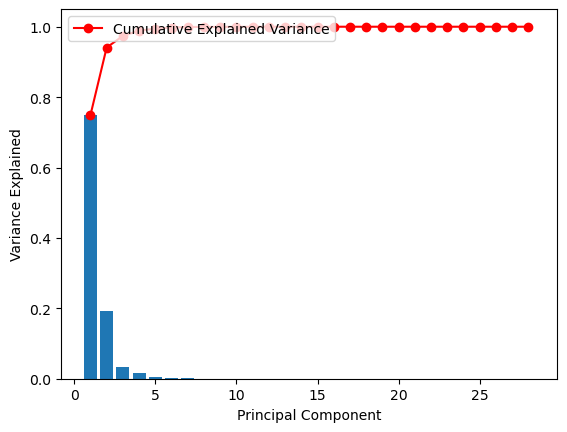

In [126]:
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', color='r', label="Cumulative Explained Variance")
plt.legend(loc='upper left')

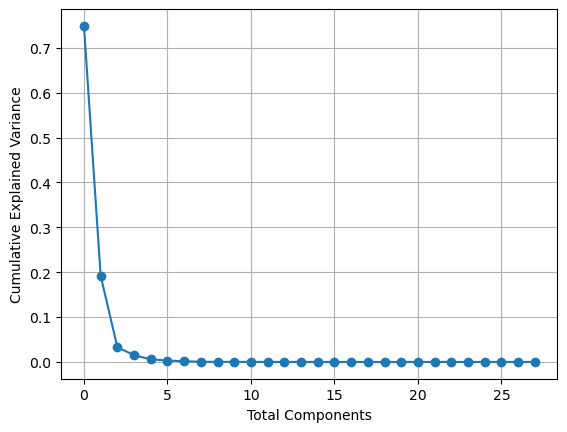

In [127]:
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Total Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [133]:
pca2 = PCA(0.90) # Retain 90% of variance
X_pca2 = pca2.fit_transform(X_scaled)
X_pca2

array([[-0.76271267, -1.39936027],
       [-0.83654128,  2.89168152],
       [-0.82447078, -0.94509046],
       [-0.80815313,  1.78225893],
       [-0.74491568, -0.8903784 ],
       [-0.91551547,  0.11431849],
       [-0.87946688, -1.98905453],
       [-0.69475565,  0.04195218],
       [-0.86065055,  0.38687159],
       [-0.95931018, -4.57828505],
       [-0.83559151,  2.2724861 ],
       [-0.81513581, -1.40014424],
       [-0.78412245, -1.84956457],
       [-0.74833105,  4.59971293],
       [-0.91525318, -3.29105673],
       [-0.77305044,  0.80947545],
       [-0.86438845,  0.683994  ],
       [-0.70827089,  3.2089662 ],
       [-0.71181281,  2.97640367],
       [-0.92901182, -5.07865464],
       [-0.7964966 ,  2.0438173 ],
       [-0.8530842 , -3.97840652],
       [-0.81522325,  0.05079141],
       [-0.80715869, -0.2122355 ],
       [-0.8366894 ,  0.15412946],
       [-0.80966083,  2.74563369],
       [-0.87193534, -1.09545497],
       [-0.83760131, -0.69094635],
       [-0.81774604,

In [134]:
X_pca2.shape

(32, 2)

In [135]:
pca2.explained_variance_ratio_

array([0.74874357, 0.19213338])

In [136]:
pca2c = PCA(n_components=2)  # Retain 2 components
X_pca2c = pca2c.fit_transform(X_scaled)

In [137]:
X_pca2c

array([[-0.76271267, -1.39936027],
       [-0.83654128,  2.89168152],
       [-0.82447078, -0.94509046],
       [-0.80815313,  1.78225893],
       [-0.74491568, -0.8903784 ],
       [-0.91551547,  0.11431849],
       [-0.87946688, -1.98905453],
       [-0.69475565,  0.04195218],
       [-0.86065055,  0.38687159],
       [-0.95931018, -4.57828505],
       [-0.83559151,  2.2724861 ],
       [-0.81513581, -1.40014424],
       [-0.78412245, -1.84956457],
       [-0.74833105,  4.59971293],
       [-0.91525318, -3.29105673],
       [-0.77305044,  0.80947545],
       [-0.86438845,  0.683994  ],
       [-0.70827089,  3.2089662 ],
       [-0.71181281,  2.97640367],
       [-0.92901182, -5.07865464],
       [-0.7964966 ,  2.0438173 ],
       [-0.8530842 , -3.97840652],
       [-0.81522325,  0.05079141],
       [-0.80715869, -0.2122355 ],
       [-0.8366894 ,  0.15412946],
       [-0.80966083,  2.74563369],
       [-0.87193534, -1.09545497],
       [-0.83760131, -0.69094635],
       [-0.81774604,

In [138]:
X_pca2c.shape

(32, 2)

In [140]:
pca2c.explained_variance_ratio_

array([0.74874357, 0.19213338])

In [142]:
colormap = plt.get_cmap('viridis')

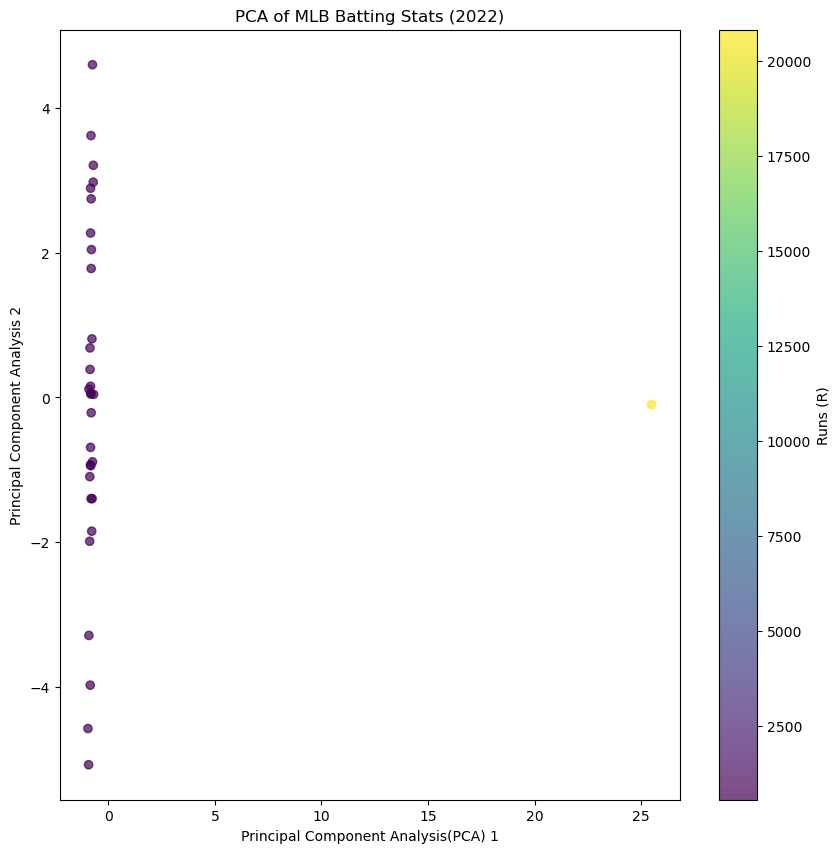

In [144]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_pca2c[:, 0], X_pca2c[:, 1],
                    c=df['R'], cmap=colormap, alpha=0.7)
plt.xlabel('Principal Component Analysis(PCA) 1')
plt.ylabel('Principal Component Analysis 2')
plt.title('PCA of MLB Batting Stats (2022)')
plt.colorbar(scatter, label='Runs (R)')
plt.show()

In [146]:
pca3c = PCA(n_components=3) 
X_pca3c = pca3c.fit_transform(X_scaled)
X_pca3c

array([[-7.62712673e-01, -1.39936027e+00, -1.25539961e+00],
       [-8.36541278e-01,  2.89168152e+00, -1.03615212e+00],
       [-8.24470784e-01, -9.45090458e-01, -9.56225136e-01],
       [-8.08153127e-01,  1.78225893e+00,  2.62847181e-01],
       [-7.44915678e-01, -8.90378396e-01, -1.04839084e-01],
       [-9.15515471e-01,  1.14318487e-01,  8.91128606e-01],
       [-8.79466878e-01, -1.98905453e+00,  1.46910658e+00],
       [-6.94755645e-01,  4.19521809e-02, -2.19681735e+00],
       [-8.60650550e-01,  3.86871595e-01,  7.87883813e-01],
       [-9.59310185e-01, -4.57828505e+00,  3.25546998e-01],
       [-8.35591514e-01,  2.27248610e+00,  6.46366210e-01],
       [-8.15135809e-01, -1.40014424e+00, -8.49012364e-01],
       [-7.84122455e-01, -1.84956457e+00, -2.01794410e-02],
       [-7.48331047e-01,  4.59971293e+00,  6.73811009e-01],
       [-9.15253183e-01, -3.29105673e+00,  1.12029709e+00],
       [-7.73050442e-01,  8.09475450e-01,  7.97286915e-01],
       [-8.64388450e-01,  6.83993998e-01

In [147]:
X_pca3c.shape

(32, 3)

In [148]:
pca3c.explained_variance_ratio_

array([0.74874357, 0.19213338, 0.03300754])

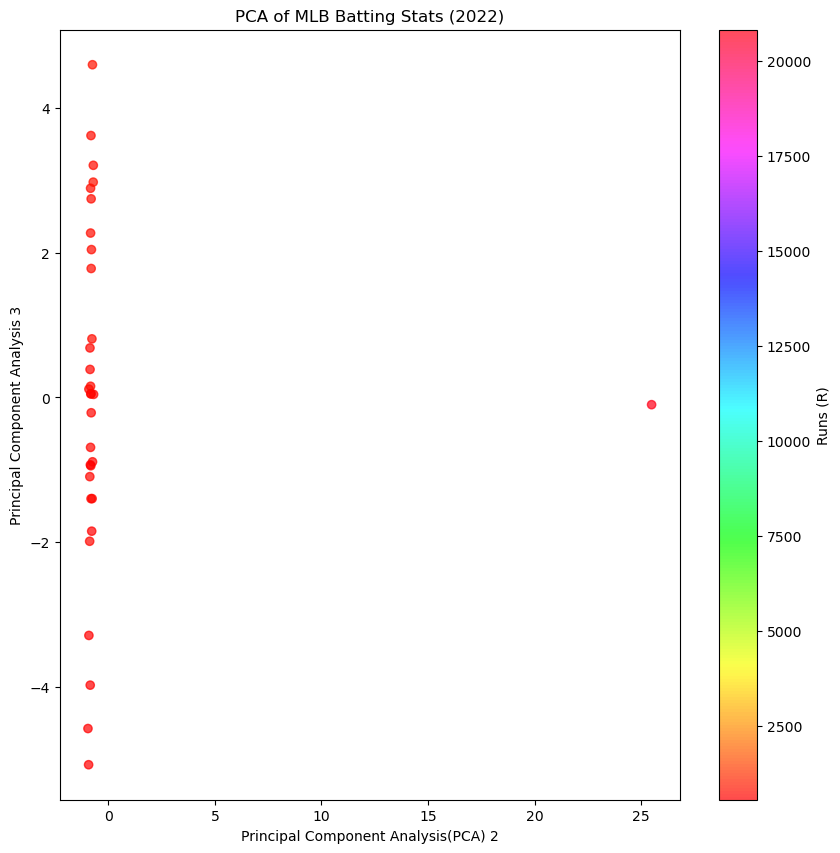

In [151]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_pca3c[:, 0], X_pca3c[:, 1],
                    c=df['R'], cmap="hsv", alpha=0.7)
plt.xlabel('Principal Component Analysis(PCA) 2')
plt.ylabel('Principal Component Analysis 3')
plt.title('PCA of MLB Batting Stats (2022)')
plt.colorbar(scatter, label='Runs (R)')
plt.show()